In the file **wpb_votes_list_2019.csv** you will find data about the votes within the Wroclaw Citizens' Budget, downloaded from the page [Wrocław Open Data](https://www.wroclaw.pl/open-data/dataset/wroclawski-budzet-obywatelski-glosowanie).

Read this data and filter it to get the following series:
1. Women under the age of 100
2. Men under the age of 100

Next, draw a cumulative plot showing how many people of a given age voted (broken down by gender).

>Hint: To generate the plot correctly, you need to ensure that both series are of the same length. To do so, use the `reindex` method with the `fill_value` option:
> `s_reindexed = s.reindex(range(0, 100), fill_value=0)`


After creating the plot, generate a table that displays this data below it. The table with the contents of the cells and the table with the description of the rows, should be generated using a loop:
```
cells = []
cellLabels = []
for i in range(0,100):
    cells.append([f'Number of female voters aged f{i}', f'Number of female voters aged f{i}'])
    cellLabels.append(f'{i}')
```
Of course, instead of the captions, the corresponding values should be shown.

Review the options in the [documentation](https://matplotlib.org/stable/api/table_api.html#matplotlib.table.Table.codes) – what parameters can be used to make the table more readable?

In [2]:
import pandas as pd

df = pd.read_csv(
                    '../../02_Charts/Data for plots/wpb_votes_list_2019.csv', 
                    sep=',',
                    decimal=','
)

df

,No,Date,Age,Sex,Post_Code,Source,Local,General
0,1,"9:01:21, 20-09-2019",33,F,54-117,I,256,132
1,2,"9:01:32, 20-09-2019",38,F,54-131,I,323,255
2,3,"9:02:28, 20-09-2019",32,F,54-107,I,256,132
3,4,"9:02:44, 20-09-2019",36,M,53-339,I,4,5
4,5,"9:02:51, 20-09-2019",31,M,50-231,I,108,120
...,...,...,...,...,...,...,...,...
83006,83007,"10:33:31, 08-10-2019",75,F,50-236,P,214,0
83007,83008,"10:34:03, 08-10-2019",73,F,50-262,P,214,0
83008,83009,"10:34:35, 08-10-2019",63,F,50-326,P,214,0
83009,83010,"10:35:21, 08-10-2019",43,F,51-114,P,434,3


In [3]:
df_women = df[(df['Sex'] == 'F') & (df['Age'] < 100)]
df_men =df[(df['Sex'] == 'M') & (df['Age'] < 100)]


In [4]:
women_reindexed = df_women.reindex(range(0, 100), fill_value=0)
men_reindexed = df_men.reindex(range(0, 100), fill_value=0)

men_reindexed == women_reindexed

In [5]:
men_reindexed == women_reindexed

,No,Date,Age,Sex,Post_Code,Source,Local,General
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False


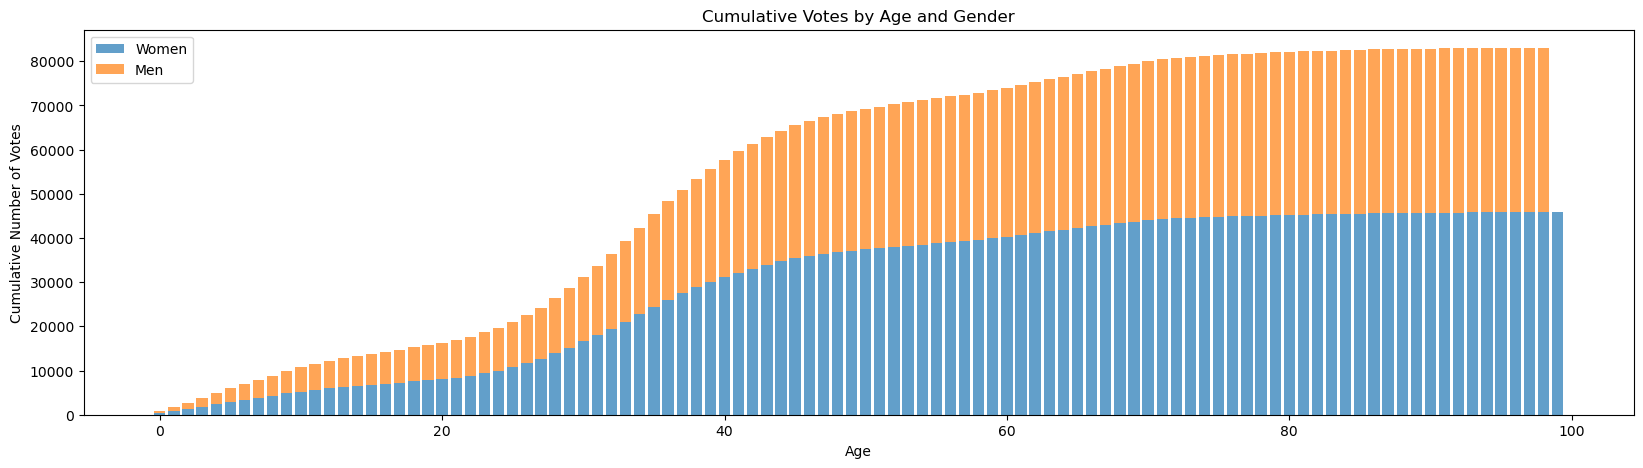

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.table import Table

# Create cumulative series for women and men
cumulative_women = df_women['Age'].value_counts().sort_index().cumsum()
cumulative_men = df_men['Age'].value_counts().sort_index().cumsum()

# Reindex the series to ensure the same length
index_range = range(0, 100)
cumulative_women_reindexed = cumulative_women.reindex(index_range, fill_value=0)
cumulative_men_reindexed = cumulative_men.reindex(index_range, fill_value=0)

# Plotting the cumulative bar chart

plt.figure(figsize=(20,5))

plt.bar(index_range, cumulative_women_reindexed, label='Women', alpha=0.7)
plt.bar(index_range, cumulative_men_reindexed, label='Men', alpha=0.7, bottom=cumulative_women_reindexed)

# Adding labels, title, and legend
plt.xlabel('Age')
plt.ylabel('Cumulative Number of Votes')
plt.title("Cumulative Votes by Age and Gender")
plt.legend()


# Show the plot
plt.show()
